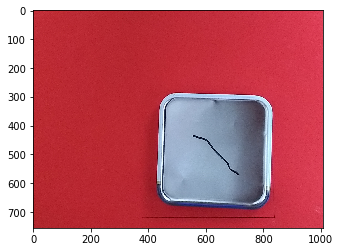

In [ ]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

scale_factor = 4
threshold_canny = 0.95
img = cv2.imread(r'S:\Imageprocessing\Audi-task\Imageset\IMG_20180402_102922725.jpg',1)
img_copy = img.copy()
img_small = cv2.resize(img_copy, (
            img_copy.shape[1] // scale_factor, img_copy.shape[0] // scale_factor))
b,g,r = cv2.split(img_small)       # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb
plt.imshow(rgb_img)

plt.show()

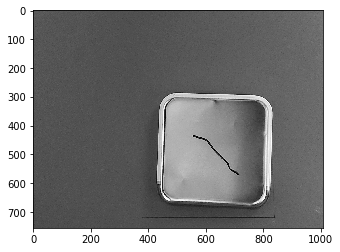

In [12]:
gray = cv2.cvtColor(img_small, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

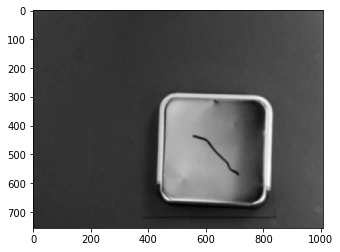

In [13]:
blur=cv2.GaussianBlur(gray,(17,17),0)

plt.imshow(blur, cmap='gray')
plt.show()


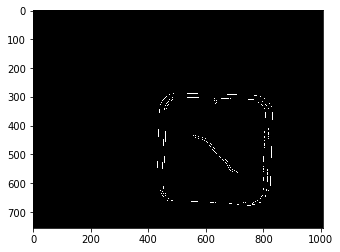

In [14]:
edge = cv2.Canny(blur, 0,100)
plt.imshow(edge, cmap='gray')
plt.show()


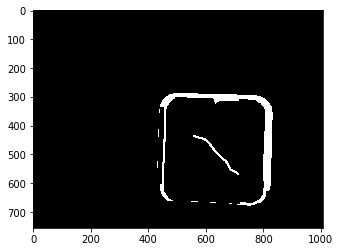

In [15]:
kernel = np.ones((15,15), np.uint8)
close = cv2.morphologyEx(edge, cv2.MORPH_CLOSE, kernel)
kernel = np.ones((2,2), np.uint8)
opens=cv2.morphologyEx(close,cv2.MORPH_OPEN,kernel)

plt.imshow(close, cmap='gray')
plt.show()

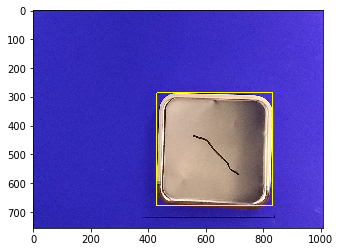

In [16]:
cnts = cv2.findContours(close, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]

# print(len(cnts))

cntrarea=[]

for i in cnts:
    cntrarea.append(cv2.contourArea(i))

# print(cntrarea)
pos= cntrarea.index(max(cntrarea))
x, y, w, h = cv2.boundingRect(cnts[pos])
cv2.rectangle(img_small, (x, y), (x + w, y + h), (255, 255, 0), 2)

plt.imshow(img_small, cmap='gray')
plt.show()


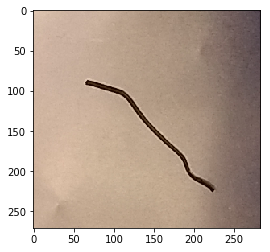

In [17]:
roi=img_small[y+60:y+h-60,x+60:x+w-60]
plt.imshow(roi, cmap='gray')
plt.show()

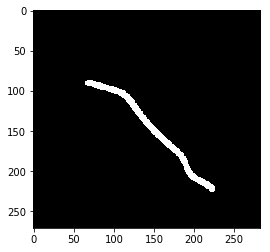

In [18]:
gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
blur=cv2.GaussianBlur(gray,(17,17),0)
edge = cv2.Canny(blur, 0,100)
kernel = np.ones((15,15), np.uint8)
close = cv2.morphologyEx(edge, cv2.MORPH_CLOSE, kernel)
kernel = np.ones((5,5), np.uint8)
opens=cv2.morphologyEx(close,cv2.MORPH_OPEN,kernel)

plt.imshow(close, cmap='gray')
plt.show()

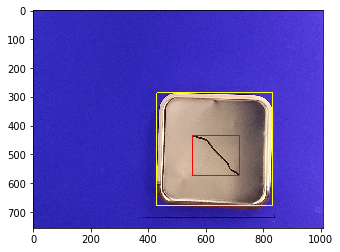

scratches identified 1


In [21]:
cnts = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]

# print(len(cnts))
cntrarea=[]

for i in cnts:
    cntrarea.append(cv2.contourArea(i))
    a, b, wd, ht = cv2.boundingRect(i)
    cv2.rectangle(roi, (a, b), (a + wd, b + ht), (255, 255, 0), 2)
    cv2.rectangle(img_small, (x+60+a, y+60+b), (x + 60+a+wd, y +60+b+ht), (255, 0, 0), 2)
# print(cntrarea)


# cv2.imshow('edited roi',roi)
plt.imshow(img_small, cmap='gray')
plt.show()
print('scratches identified', len(cnts))
